In [82]:
import re
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import feature_extraction, tree, model_selection, metrics
from sklearn.model_selection import train_test_split
from urllib.parse import urlparse

####Funciones

In [83]:
def informacionURL(url):
    URL = urlparse(url)
    return URL.hostname, URL.scheme

def conteo(a):
    return lambda s: sum(s.count(x) for x in a)

In [84]:
data = pd.read_csv('dataset_pishing.csv')

####Info del dataset

In [85]:
data.info

<bound method DataFrame.info of                                                      url  ip  nb_www  nb_com  \
0                  http://www.crestonwood.com/router.php   0       1       0   
1      http://shadetreetechnology.com/V4/validation/a...   1       0       0   
2      https://support-appleld.com.secureupdate.duila...   1       0       1   
3                                     http://rgipt.ac.in   0       0       0   
4      http://www.iracing.com/tracks/gateway-motorspo...   0       1       0   
...                                                  ...  ..     ...     ...   
11425      http://www.fontspace.com/category/blackletter   0       1       0   
11426  http://www.budgetbots.com/server.php/Server%20...   0       1       1   
11427  https://www.facebook.com/Interactive-Televisio...   1       1       0   
11428             http://www.mypublicdomainpictures.com/   0       1       0   
11429  http://174.139.46.123/ap/signin?openid.pape.ma...   1       1       0   

       

In [86]:
data.columns

Index(['url', 'ip', 'nb_www', 'nb_com', 'nb_dslash', 'http_in_path',
       'punycode', 'port', 'tld_in_path', 'tld_in_subdomain',
       'abnormal_subdomain', 'nb_subdomains', 'prefix_suffix', 'random_domain',
       'shortening_service', 'path_extension', 'nb_redirection',
       'nb_external_redirection', 'length_words_raw', 'char_repeat',
       'shortest_words_raw', 'shortest_word_host', 'shortest_word_path',
       'longest_words_raw', 'longest_word_host', 'longest_word_path',
       'avg_words_raw', 'avg_word_host', 'avg_word_path', 'phish_hints',
       'domain_in_brand', 'brand_in_subdomain', 'brand_in_path',
       'suspecious_tld', 'statistical_report', 'nb_hyperlinks',
       'ratio_intHyperlinks', 'ratio_extHyperlinks', 'ratio_nullHyperlinks',
       'nb_extCSS', 'ratio_intRedirection', 'ratio_extRedirection',
       'ratio_intErrors', 'ratio_extErrors', 'login_form', 'external_favicon',
       'links_in_tags', 'submit_email', 'ratio_intMedia', 'ratio_extMedia',
       'sf

#### Ejemplo 5 observaciones del dataset

In [87]:
data.head()

,url,ip,nb_www,nb_com,nb_dslash,http_in_path,punycode,port,tld_in_path,tld_in_subdomain,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,0,1,0,0,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,1,0,0,0,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,1,0,1,0,0,0,0,0,1,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,0,0,0,0,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,0,1,0,0,0,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


####Cantidad de observaciones etiquetadas en la columna "status"

In [88]:
data['status'].value_counts()

legitimate    5715
phishing      5715
Name: status, dtype: int64

#### Derivacion de caracteristicas

#### F1

In [89]:
data['url_len'] = data['url'].apply(len)
data['url_len']

0         37
1         77
2        126
3         18
4         55
        ... 
11425     45
11426     84
11427    105
11428     38
11429    477
Name: url_len, Length: 11430, dtype: int64

####F2

In [90]:
data['hostname'], data['scheme'] = zip(*data['url'].apply(informacionURL)) # scheme for f25
data['hostname_len'] = data['hostname'].apply(len)

In [91]:
data['hostname']

0                                      www.crestonwood.com
1                                  shadetreetechnology.com
2        support-appleld.com.secureupdate.duilawyeryork...
3                                              rgipt.ac.in
4                                          www.iracing.com
                               ...                        
11425                                    www.fontspace.com
11426                                   www.budgetbots.com
11427                                     www.facebook.com
11428                       www.mypublicdomainpictures.com
11429                                       174.139.46.123
Name: hostname, Length: 11430, dtype: object

In [92]:
data['hostname_len']

0        19
1        23
2        50
3        11
4        15
         ..
11425    17
11426    18
11427    16
11428    30
11429    14
Name: hostname_len, Length: 11430, dtype: int64

#### F4 a F20

In [93]:
caracteresEspeciales = ['.','-','@','?','&','|','=','_',' ̃','%','/','*',':',',',';','$']

espacios = ['%20', ' ']


for caracter in caracteresEspeciales:
    data[f'{caracter}_count'] = data['url'].apply(conteo(caracter))

data['space_count'] = data['url'].apply(conteo(espacios))


In [94]:
data['space_count']

0        0
1        0
2        0
3        0
4        0
        ..
11425    0
11426    1
11427    0
11428    0
11429    0
Name: space_count, Length: 11430, dtype: int64

#### F25

In [95]:
data['is_https'] = data['scheme'].apply(lambda scheme: int(scheme.lower() == 'https'))


In [96]:
data['is_https']

0        0
1        0
2        1
3        0
4        0
        ..
11425    0
11426    0
11427    1
11428    0
11429    0
Name: is_https, Length: 11430, dtype: int64

####F26 y F27

In [97]:
radioDigitos = lambda s: sum(c.isdigit() for c in s) / sum(not c.isdigit() for c in s)
data['digit_ratio_url'] = data['url'].apply(radioDigitos)

In [98]:
data['digit_ratio_url']

0        0.000000
1        0.283333
2        0.177570
3        0.000000
4        0.000000
           ...   
11425    0.000000
11426    0.024390
11427    0.166667
11428    0.000000
11429    0.094037
Name: digit_ratio_url, Length: 11430, dtype: float64

In [99]:
data['digit_ratio_hostname'] = data['url'].apply(radioDigitos)

In [100]:
data['digit_ratio_hostname']

0        0.000000
1        0.283333
2        0.177570
3        0.000000
4        0.000000
           ...   
11425    0.000000
11426    0.024390
11427    0.166667
11428    0.000000
11429    0.094037
Name: digit_ratio_hostname, Length: 11430, dtype: float64

####Preprocesamiento

In [101]:
data['status'] = np.where(data['status'] == 'phishing', 1, 0)

In [102]:
data['status']

0        0
1        1
2        1
3        0
4        0
        ..
11425    0
11426    1
11427    0
11428    0
11429    1
Name: status, Length: 11430, dtype: int64

####Pandas profiling

In [103]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [104]:
from pandas_profiling import ProfileReport
profile = pandas_profiling.ProfileReport(data)
print(profile)

TypeError: ignored

#####Se intento solucionar el problema con pandas profiling, sin embargo se opto por realizar una solucion alterna como una matriz de correlacion

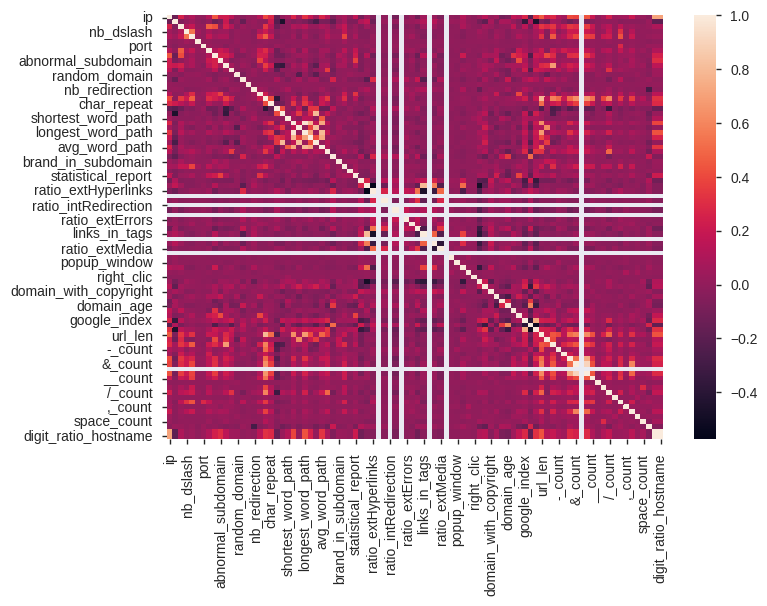

In [105]:
sns.heatmap(data.corr())

####Seleccion de caracteristicas

In [107]:
df = data[['status','nb_www', 'phish_hints', 'nb_hyperlinks', 'length_words_raw', 'domain_in_title', 'ratio_intHyperlinks', 'ratio_extHyperlinks', 'domain_age', 'web_traffic', 'page_rank', 'url_len', 'hostname_len', 'space_count', 'digit_ratio_url']]
df.drop_duplicates()

,status,nb_www,phish_hints,nb_hyperlinks,length_words_raw,domain_in_title,ratio_intHyperlinks,ratio_extHyperlinks,domain_age,web_traffic,page_rank,url_len,hostname_len,space_count,digit_ratio_url
0,0,1,0,17,4,0,0.529412,0.470588,-1,0,4,37,19,0,0.000000
1,1,0,0,30,4,1,0.966667,0.033333,5767,0,2,77,23,0,0.283333
2,1,0,0,4,12,1,1.000000,0.000000,4004,5828815,0,126,50,0,0.177570
3,0,0,0,149,1,1,0.973154,0.026846,-1,107721,3,18,11,0,0.000000
4,0,1,0,102,6,0,0.470588,0.529412,8175,8725,6,55,15,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,0,1,0,199,4,0,0.884422,0.115578,5396,3980,6,45,17,0,0.000000
11426,1,1,0,3,12,1,1.000000,0.000000,6728,0,0,84,18,1,0.024390
11427,0,1,0,68,13,0,0.470588,0.529412,8515,8,10,105,16,0,0.166667
11428,0,1,0,32,2,1,0.375000,0.625000,2836,2455493,4,38,30,0,0.000000
